In [2]:
import sys
from pathlib import Path

# Add project root to Python path
project_root = str(Path.cwd().resolve().parents[0])
if project_root not in sys.path:
    sys.path.append(project_root)

In [3]:
from src.data.make_dataset import collect_data_employ
employ_data = collect_data_employ()

import pandas as pd
employ_data = pd.DataFrame(employ_data)
qual =['성별','외국인학생','입학전형명','교환유학생여부','취업구분']
for col in qual:
    employ_data[col] = employ_data[col].astype('category')

employ_data.describe(include=['category'])

INFO:numexpr.utils:NumExpr defaulting to 11 threads.
INFO:src.data.make_dataset:Retrieved 1035 records


,성별,외국인학생,입학전형명,교환유학생여부,취업구분
count,1035,1035,1035,691,1035
unique,2,2,38,2,11
top,남,아니오,정시`가`군,아니오,취업자(국내)
freq,566,996,151,642,580


In [3]:
freq_취업구분 = pd.DataFrame(employ_data['취업구분'].value_counts())
freq_취업구분

,count
취업구분,
취업자(국내),580
기타,252
미상,116
진학자(국내대학원),36
1인창(사)업자,15
선택,14
프리랜서,7
진학자(국외대학원),5
취업자(해외),5


사용 가능한 한글 폰트:
- Apple LiGothic
- Apple SD Gothic Neo
- AppleGothic
- AppleMyungjo
- BIZ UDGothic
- Hiragino Maru Gothic Pro
- Malgun Gothic Boot
- Nanum Gothic
- NanumGothic
- NanumGothic
- NanumGothic
- NanumGothic
- Noto Sans Gothic
- PCMyungjo
- Toppan Bunkyu Gothic
- Toppan Bunkyu Midashi Gothic
- Tsukushi A Round Gothic
- Tsukushi B Round Gothic
- YuGothic
- YuGothic


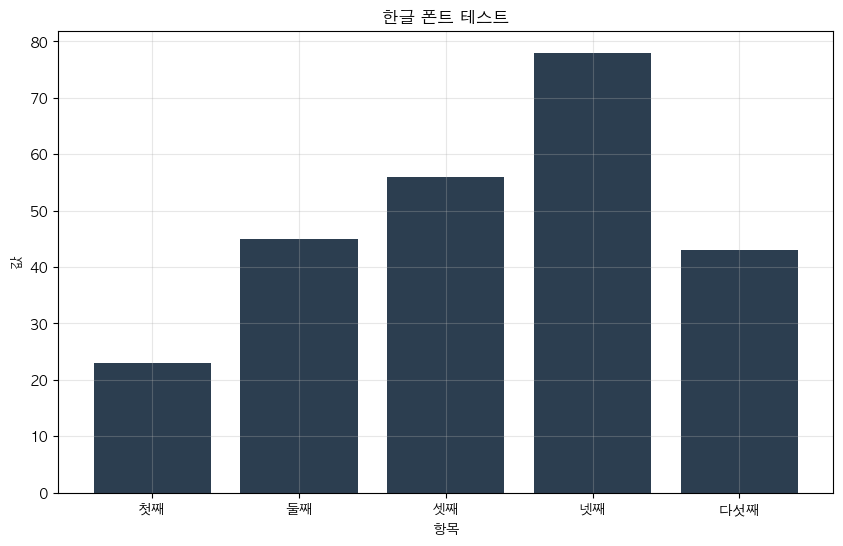

In [4]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np

# 시스템에 설치된 폰트 목록 확인
def print_available_fonts():
    fonts = [f.name for f in fm.fontManager.ttflist]
    korean_fonts = [f for f in fonts if any(korean in f for korean in ['Gothic', 'Myungjo', '맑은', '나눔', '돋움'])]
    print("사용 가능한 한글 폰트:")
    for font in sorted(korean_fonts):
        print(f"- {font}")

# 기본 한글 폰트 설정 방법
plt.rc('font', family='AppleGothic')  # 맥OS 기본 한글 폰트

# 그래프 예시
def create_sample_graph():
    # 데이터 준비
    categories = ['첫째', '둘째', '셋째', '넷째', '다섯째']
    values = [23, 45, 56, 78, 43]
    
    # 그래프 생성
    plt.figure(figsize=(10, 6))
    plt.bar(categories, values, color='#2C3E50')
    plt.title('한글 폰트 테스트')
    plt.xlabel('항목')
    plt.ylabel('값')
    
    # 그리드 추가
    plt.grid(True, alpha=0.3)
    plt.show()

# 나눔고딕 폰트 사용 예시
def use_nanum_font():
    # 나눔고딕 폰트 설정
    plt.rc('font', family='NanumGothic')
    
    create_sample_graph()

# 여러 폰트를 우선순위로 설정
def set_multiple_fonts():
    plt.rc('font', family=['AppleGothic', 'NanumGothic', 'Malgun Gothic'])
    
    create_sample_graph()

# 폰트 정보 출력
print_available_fonts()

# 그래프 생성 예시
create_sample_graph()

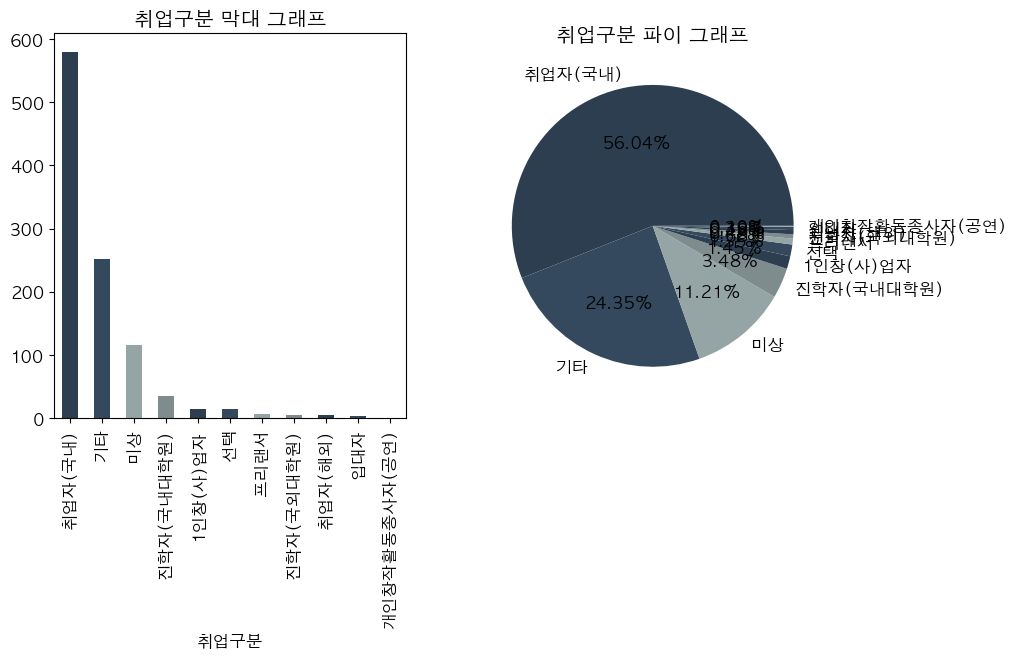

In [5]:
# plotting 환경 설정
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.unicode_minus'] = False
fig, ax = plt.subplots(1,2, figsize=(10,5))

# 막대 그래프
ax[0].set_title('취업구분 막대 그래프')
freq_취업구분['count'].plot.bar(ax=ax[0], color=['#2c3e50','#34495e','#95a5a6','#7f8c8d'])

# 파이 그래프
ax[1].set_title('취업구분 파이 그래프')
_ = ax[1].pie(freq_취업구분['count'].values, labels=freq_취업구분.index, autopct="%.2f%%", colors=['#2c3e50','#34495e','#95a5a6','#7f8c8d'])


plt.show()

In [6]:
employ_data['평점평균']


0       3.20
1       2.13
2       3.92
3       3.67
4       3.46
        ... 
1030    3.34
1031    4.38
1032    3.24
1033    3.77
1034    4.30
Name: 평점평균, Length: 1035, dtype: float64